In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [38]:
df = pd.read_excel('customer_data.xlsx')


In [39]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [40]:
df['workclass'].mode()
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [41]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [42]:
le = LabelEncoder()
df['sex'] = pd.get_dummies(df['sex'],drop_first=True,dtype='int')


In [43]:
df['native-country'] = le.fit_transform(df['native-country'])
df['race'] = le.fit_transform(df['race'])

df['relationship'] = le.fit_transform(df['relationship'])
df['occupation'] = le.fit_transform(df['occupation'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['education'] = le.fit_transform(df['education'])
df['workclass'] = le.fit_transform(df['workclass'])
df['income'] = le.fit_transform(df['income'])

In [44]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,1
48838,64,4,321403,11,9,6,10,2,2,1,0,0,40,39,1
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,1
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,1


In [45]:
df = df.drop('capital-gain',axis=True)
df = df.drop('capital-loss',axis=True)
df = df.drop('native-country',axis=True)
# df = df.drop('education-num',axis=True)

In [46]:
df.isnull().sum()/len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
hours-per-week    0.0
income            0.0
dtype: float64

In [47]:
x=df.iloc[:,0:11]
x
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    1
48838    1
48839    1
48840    1
48841    3
Name: income, Length: 48842, dtype: int32

In [48]:
df['income'].unique()

array([0, 2, 1, 3])

In [49]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [50]:
len(x_train) , len(x_test)

(39073, 9769)

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
y_pred_en = model.predict(x_test)

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 1.711\nsamples = 39073\nvalue = [19784, 9975, 6239, 3075]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 1.908\nsamples = 15772\nvalue = [5821, 2886, 4725, 2340]'),
 Text(0.125, 0.375, 'x[4] <= 8.5\nentropy = 1.834\nsamples = 11033\nvalue = [4944, 2437, 2419, 1233]'),
 Text(0.0625, 0.125, 'entropy = 1.483\nsamples = 1835\nvalue = [1049, 552, 147, 87]'),
 Text(0.1875, 0.125, 'entropy = 1.866\nsamples = 9198\nvalue = [3895, 1885, 2272, 1146]'),
 Text(0.375, 0.375, 'x[10] <= 31.5\nentropy = 1.768\nsamples = 4739\nvalue = [877, 449, 2306, 1107]'),
 Text(0.3125, 0.125, 'entropy = 1.838\nsamples = 305\nvalue = [134, 58, 78, 35]'),
 Text(0.4375, 0.125, 'entropy = 1.735\nsamples = 4434\nvalue = [743, 391, 2228, 1072]'),
 Text(0.75, 0.625, 'x[7] <= 4.5\nentropy = 1.379\nsamples = 23301\nvalue = [13963, 7089, 1514, 735]'),
 Text(0.625, 0.375, 'x[4] <= 12.5\nentropy = 1.268\nsamples = 21477\nvalue = [13315, 6771, 927, 464]'),
 Text(0.5625, 0.125, 'entropy

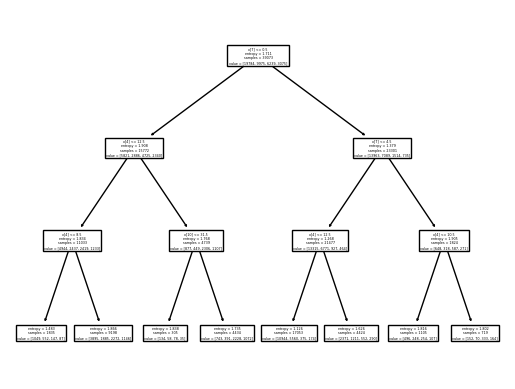

In [53]:
tree.plot_tree(model)

In [54]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5463


In [61]:
### Random Forest
x=df.iloc[:,0:11]
x
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    1
48838    1
48839    1
48840    1
48841    3
Name: income, Length: 48842, dtype: int32

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [66]:
model.score(X_test, y_test)

0.5112089261951069

In [68]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 0, ..., 0, 0, 0])

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3720,  755,  410,   99],
       [1734,  481,  192,   52],
       [ 557,  129,  712,  168],
       [ 263,   78,  338,   81]], dtype=int64)

In [72]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23') instead.

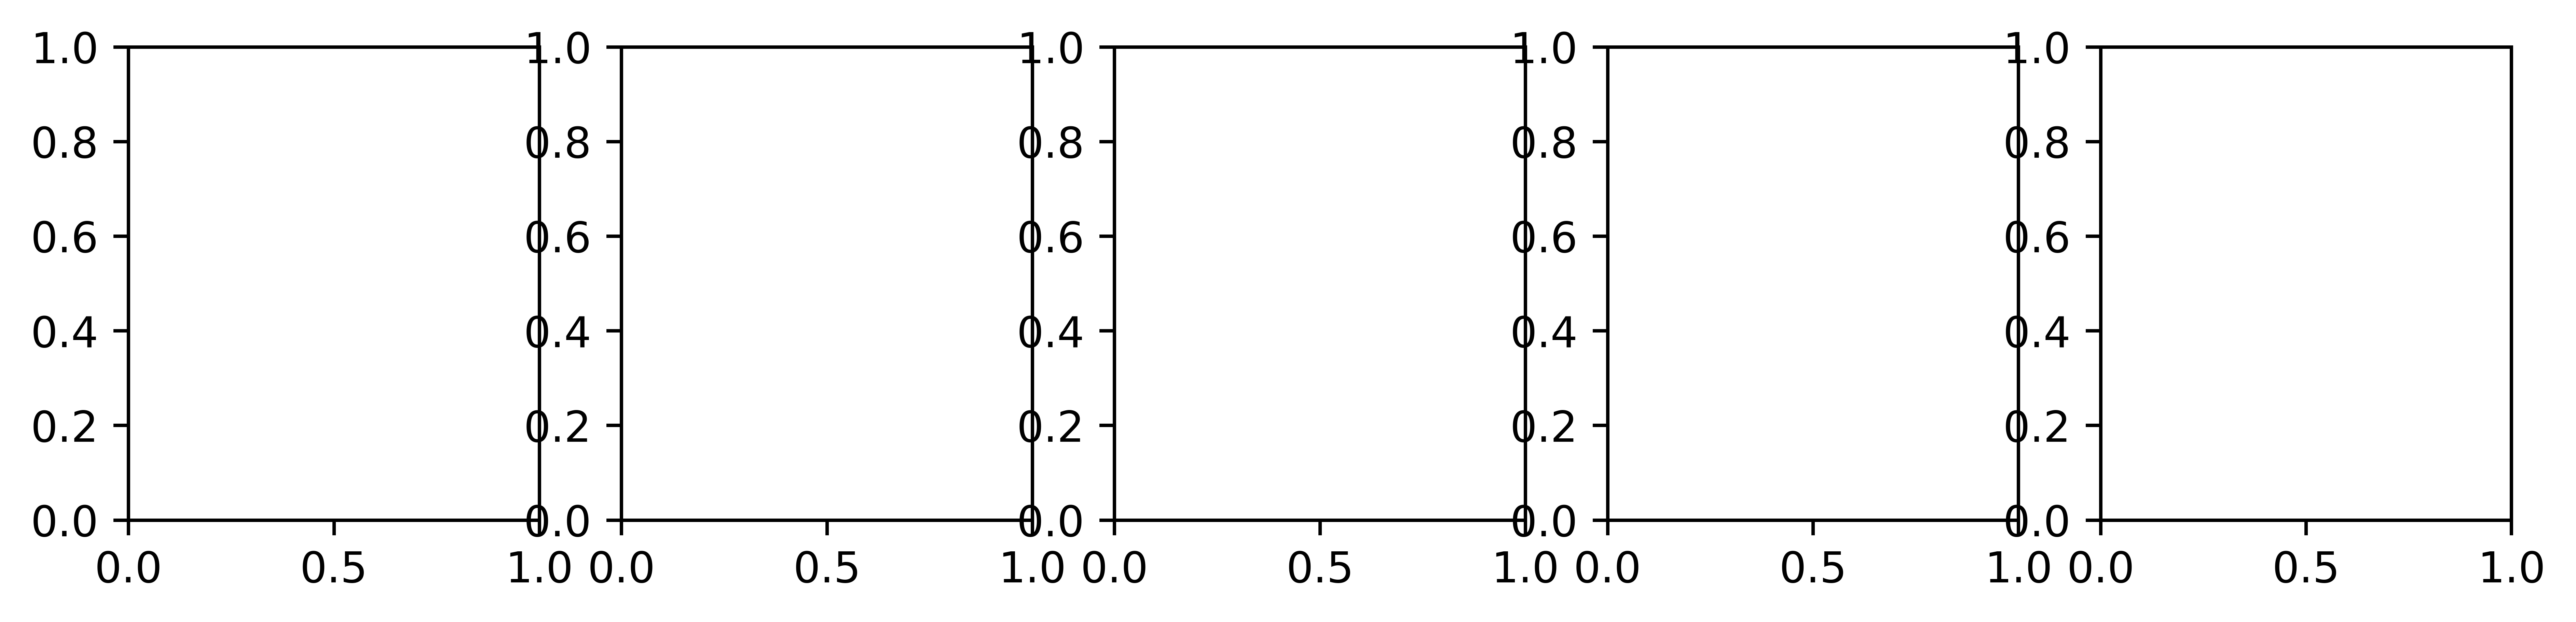

Text(95.72222222222221, 0.5, 'Truth')

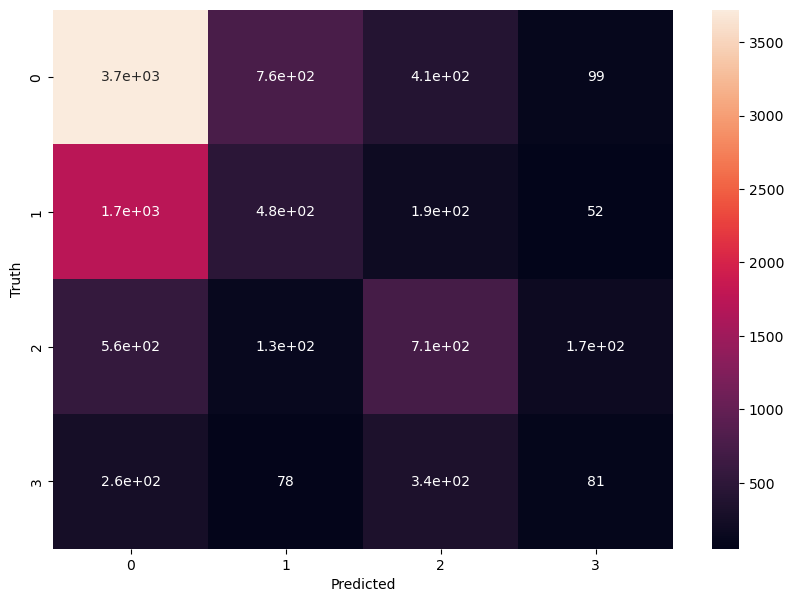

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')